# Understand the best method for color fitting


In [ ]:
import glob
import os

import colour
import numpy as np

from colour_checker_detection import (
    ROOT_RESOURCES_EXAMPLES,
    detect_colour_checkers_segmentation,
)

colour.plotting.colour_style()

colour.utilities.describe_environment();

path="/home/girobat/Olive/foto olivo del  07.08.24/da01c0"

COLOUR_CHECKER_IMAGE_PATHS = glob.glob(
    os.path.join(path, '*.jpg'))

COLOUR_CHECKER_IMAGES = [
    colour.cctf_decoding(colour.io.read_image(path))
    for path in COLOUR_CHECKER_IMAGE_PATHS
]
# for image in COLOUR_CHECKER_IMAGES:
#     colour.plotting.plot_image(colour.cctf_encoding(image))

1. -- Difference between Detected swatches and Reference swatches--


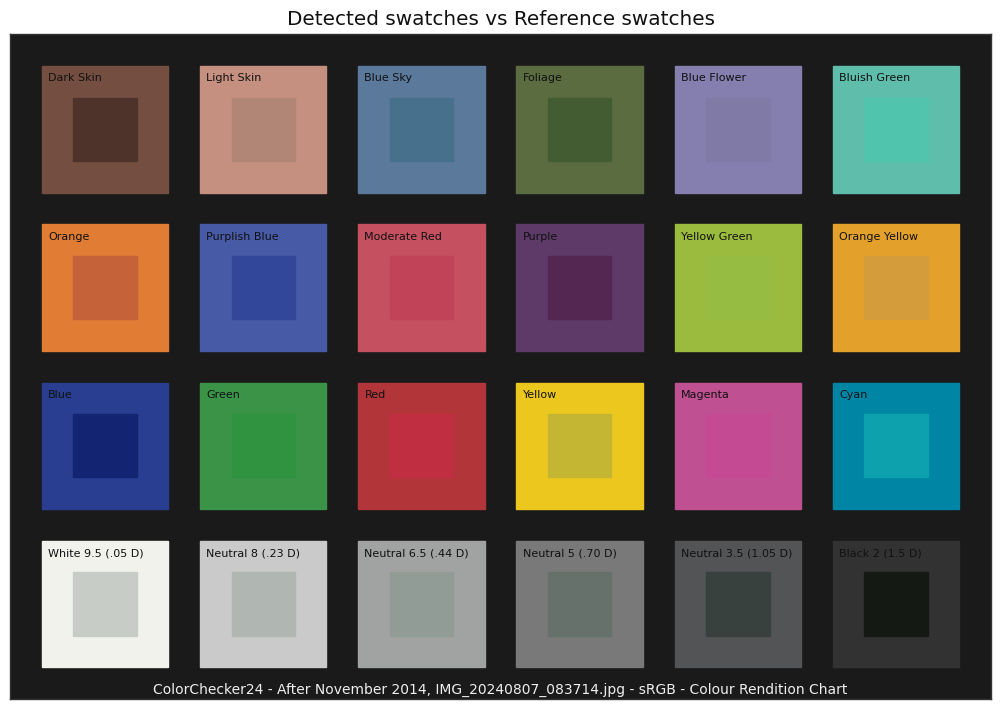

ΔE (mean): 6.1458, ΔE (max): 11.7550
2. -- Difference between Corrected swatches and Reference swatches--


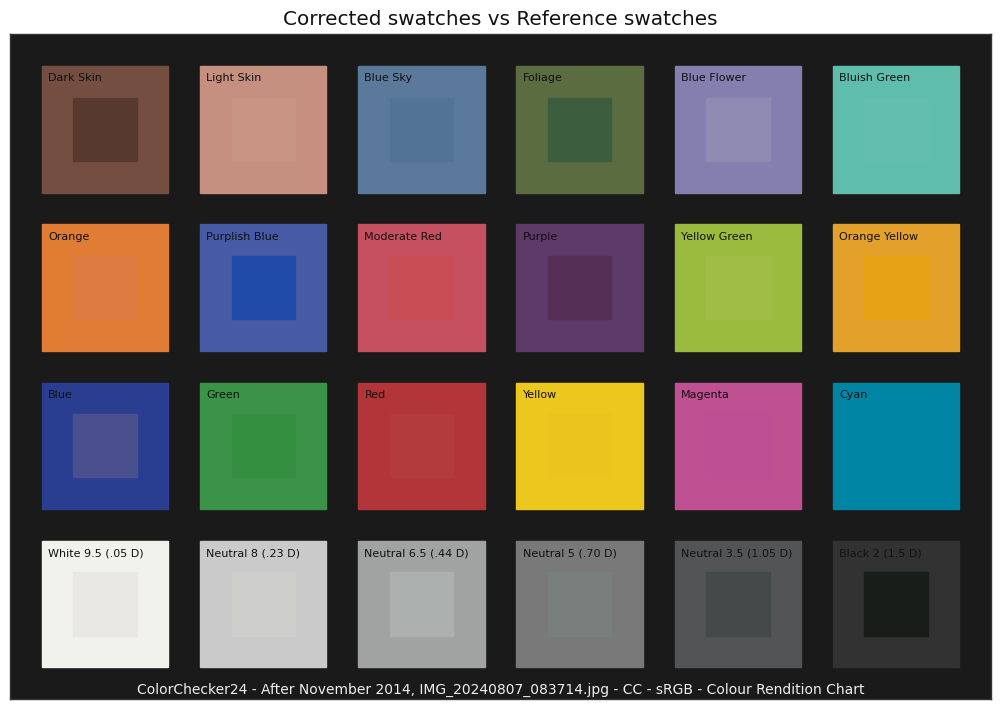

ΔE (mean): 3.4779, ΔE (max): 8.4642
3. -- Difference between swatches detected from original images and reference swatches--


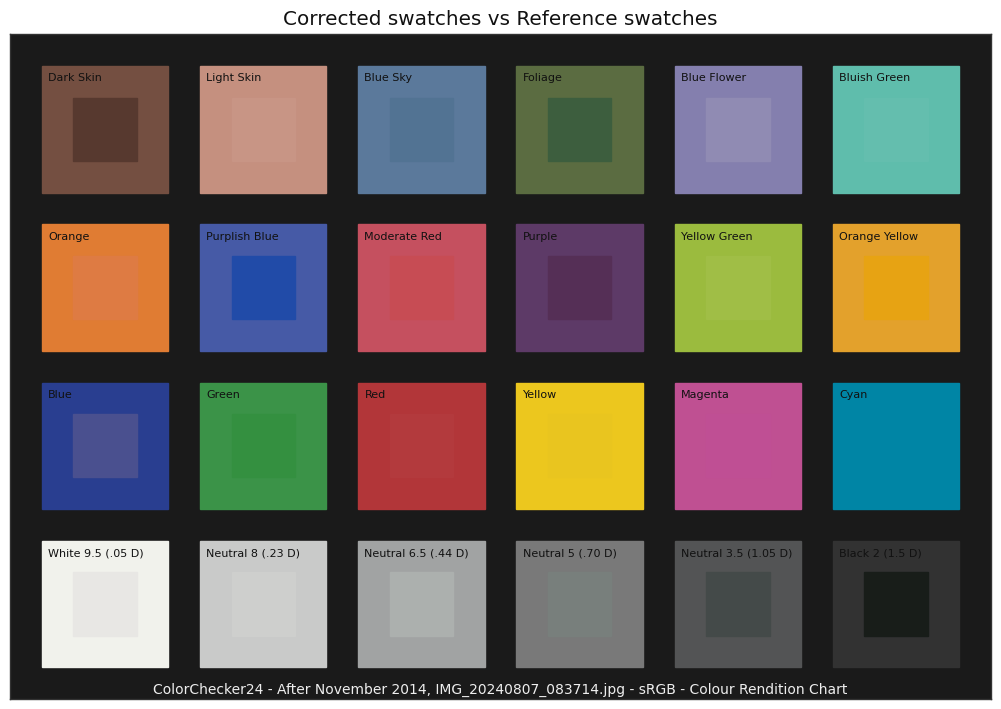

ΔE (mean): 3.4788, ΔE (max): 8.4726


In [12]:
D65 = colour.CCS_ILLUMINANTS["CIE 1931 2 Degree Standard Observer"]["D65"]
REFERENCE_COLOUR_CHECKER = colour.CCS_COLOURCHECKERS[
    "ColorChecker24 - After November 2014"
]

colour_checker_rows = REFERENCE_COLOUR_CHECKER.rows
colour_checker_columns = REFERENCE_COLOUR_CHECKER.columns

# NOTE: The reference swatches values as produced by the "colour.XYZ_to_RGB"
# definition are linear by default.
# See https://github.com/colour-science/colour-checker-detection/discussions/59
# for more information.
REFERENCE_SWATCHES = colour.XYZ_to_RGB(
    colour.xyY_to_XYZ(list(REFERENCE_COLOUR_CHECKER.data.values())),
    "sRGB",
    REFERENCE_COLOUR_CHECKER.illuminant,
)

#method='Cheung 2004'
method='Finlayson 2015'
#method='Vandermonde'
degree=3
#root_polynomial_expansion=True

image=COLOUR_CHECKER_IMAGES[0]
image_path=COLOUR_CHECKER_IMAGE_PATHS[0]
colour_checker_data=detect_colour_checkers_segmentation(
        image, additional_data=True
    )
detected_swatches, swatch_masks, colour_checker_image, quadrilateral = colour_checker_data[0].values




# Plot the the difference between the original and reference swatches.
swatches_xyY = colour.XYZ_to_xyY(colour.RGB_to_XYZ(detected_swatches, "sRGB", D65))

colour_checker = colour.characterisation.ColourChecker(
        os.path.basename(image_path),
        dict(zip(REFERENCE_COLOUR_CHECKER.data.keys(), swatches_xyY, strict=False)),
        D65,
        colour_checker_rows,
        colour_checker_columns,
    )


# 1-- Difference between Detected swatches and Reference swatches--
print("1. -- Difference between Detected swatches and Reference swatches--")
colour.plotting.plot_multi_colour_checkers(
    [REFERENCE_COLOUR_CHECKER, colour_checker],
    # You can set the title here if you want a custom one
    title='Detected swatches vs Reference swatches',
    
    # Pass Matplotlib title properties via the 'artist' dict
    artist={
        'title': {
            'color': 'red',
            'fontsize': 14    
        }
    }
)
detected_swatches_Lab = colour.XYZ_to_Lab(colour.RGB_to_XYZ(
        detected_swatches, 'sRGB', D65))
REFERENCE_SWATCHES_Lab= colour.XYZ_to_Lab(colour.RGB_to_XYZ(
        REFERENCE_SWATCHES, 'sRGB', D65))

delta_E_detected = colour.delta_E(detected_swatches_Lab, REFERENCE_SWATCHES_Lab, method='CIE 2000')
print("ΔE (mean): {0:.4f}, ΔE (max): {1:.4f}".format(np.mean(delta_E_detected), np.max(delta_E_detected)))

# 2 -- Difference between Corrected swatches and Reference swatches--
print("2. -- Difference between Corrected swatches and Reference swatches--")
corrected_swatches = colour.colour_correction(detected_swatches, detected_swatches, REFERENCE_SWATCHES,method=method,degree=degree)

corrected_swatches_xyY = colour.XYZ_to_xyY(colour.RGB_to_XYZ(corrected_swatches, "sRGB", D65))
colour_checker_corrected = colour.characterisation.ColourChecker(
        f"{os.path.basename(image_path)} - CC",
        dict(zip(REFERENCE_COLOUR_CHECKER.data.keys(), corrected_swatches_xyY, strict=False)),
        D65,
        colour_checker_rows,
        colour_checker_columns,
    )

colour.plotting.plot_multi_colour_checkers(
        [REFERENCE_COLOUR_CHECKER, colour_checker_corrected],
    # You can set the title here if you want a custom one
    title='Corrected swatches vs Reference swatches',
    
    # Pass Matplotlib title properties via the 'artist' dict
    artist={
        'title': {
            'color': 'red',
            'fontsize': 14    
        }
    }
    )

corrected_swatches_Lab = colour.XYZ_to_Lab(colour.RGB_to_XYZ(
        corrected_swatches, 'sRGB', D65))

delta_E_corrected = colour.delta_E(corrected_swatches_Lab, REFERENCE_SWATCHES_Lab, method='CIE 2000')
print("ΔE (mean): {0:.4f}, ΔE (max): {1:.4f}".format(np.mean(delta_E_corrected), np.max(delta_E_corrected)))

# 3 -- Difference between swatches detected from original images and reference swatches--
print("3. -- Difference between swatches detected from original images and reference swatches--")

image_corrected=colour.colour_correction(
                image, detected_swatches, REFERENCE_SWATCHES,method=method,degree=degree
            )

colour_checker_data2=detect_colour_checkers_segmentation(
        image_corrected, additional_data=True
    )
detected_swatches2, swatch_masks, colour_checker_image, quadrilateral = colour_checker_data2[0].values




# Plot the the difference between the original and reference swatches.
swatches_xyY2 = colour.XYZ_to_xyY(colour.RGB_to_XYZ(detected_swatches2, "sRGB", D65))

colour_checker2 = colour.characterisation.ColourChecker(
        os.path.basename(image_path),
        dict(zip(REFERENCE_COLOUR_CHECKER.data.keys(), swatches_xyY2, strict=False)),
        D65,
        colour_checker_rows,
        colour_checker_columns,
    )

colour.plotting.plot_multi_colour_checkers(
        [REFERENCE_COLOUR_CHECKER, colour_checker2],
    # You can set the title here if you want a custom one
    title='Corrected swatches vs Reference swatches',
    
    # Pass Matplotlib title properties via the 'artist' dict
    artist={
        'title': {
            'color': 'red',
            'fontsize': 14    
        }
    }
    )
detected_swatches2_Lab = colour.XYZ_to_Lab(colour.RGB_to_XYZ(
        detected_swatches2, 'sRGB', D65))

delta_E2 = colour.delta_E(detected_swatches2_Lab, REFERENCE_SWATCHES_Lab, method='CIE 2000')
print("ΔE (mean): {0:.4f}, ΔE (max): {1:.4f}".format(np.mean(delta_E2), np.max(delta_E2)))

# Compare the method
starting from a set of images, understand the method and the degree that gives the lowest delta E mantaining the colour checker detectable in the 
corrected images

In [13]:
!python gridsearch_script.py --path_dir "foto olivo del 07.08.24/da01c0" --file_to_save "grid_results.json" --degree 4

5456.37s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


  Using images from: foto olivo del 07.08.24/da01c0
 Results will be saved to: grid_results.json
 Max polynomial degree setted: 4
Method: Cheung 2004
  Degree: 1
  Degree: 2
  Degree: 3
  Degree: 4
Method: Finlayson 2015
  Degree: 1
  Degree: 2
  Degree: 3
  Degree: 4
Method: Vandermonde
  Degree: 1
  Degree: 2
  Degree: 3
  Degree: 4
✅ Dictionary successfully saved to grid_results.json


In [ ]:
result_path="grid_results.json"
import json
import numpy as np 

results=json.load(open(result_path))

mean_corrected_swatches = {
    method: {
        degree: np.mean(results[method][degree]["swatches"])
        for degree in results[method]
        if not np.any(results[method][degree]["corrected_image"] == None)
    }
    for method in results
    if method != "NoCorrection"
}
print(mean_corrected_swatches)
print(results['Vandermonde']['4']["corrected_image"])

{'Cheung 2004': {'1': np.float64(4.705854032857306), '2': np.float64(4.705854032857306), '3': np.float64(4.705854032857306), '4': np.float64(4.705854032857306)}, 'Finlayson 2015': {'1': np.float64(4.705854032857306), '2': np.float64(3.9887351266172737), '3': np.float64(3.207363488549078), '4': np.float64(0.5173306502987082)}, 'Vandermonde': {'1': np.float64(5.522953724250009), '2': np.float64(4.93908471946159), '3': np.float64(4.425302180733697), '4': np.float64(3.8758180840354095)}}
[None, None, None, None, None, None, None]
False
